In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#To read/import dataset
data=pd.read_csv("tested.csv")

In [3]:
#To Know last 10 elements
data.tail(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
#How many survived
num=data[data['Survived']==1]['Survived'].count()

<AxesSubplot:>

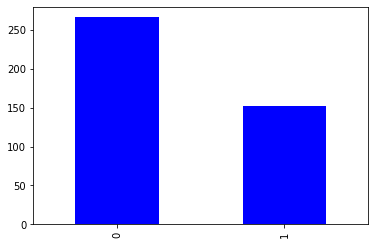

In [6]:
#Survived
survival=data['Survived'].value_counts()
survival.plot(kind='bar',color='blue')

<AxesSubplot:>

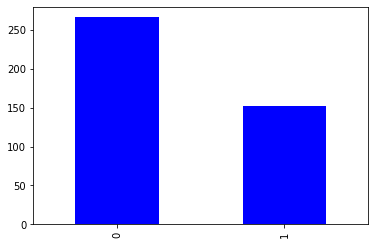

In [7]:
#Survived
survival=data['Survived'].value_counts()
survival.plot(kind='bar',color='blue')

In [8]:
#Children died but their relatives survived
child=data[data['Age']<18]
cond1=child[(child['SibSp']!=0) | (child['Parch']!=0)]['Survived'].value_counts()
cond1[0]

18

<AxesSubplot:xlabel='Pclass,Survived'>

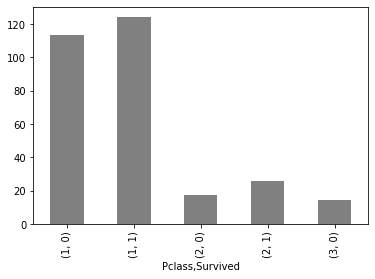

In [9]:
#no.of people above 50 travelling and have survived along with their class 
senior=data[data['Age']>=50]
senior.groupby(['Pclass','Survived'])['Fare'].mean().plot(kind='bar',color='grey')

<AxesSubplot:xlabel='Sex', ylabel='count'>

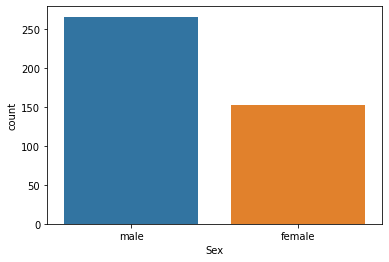

In [10]:
#Countplot
sns.countplot(x='Sex',data=data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

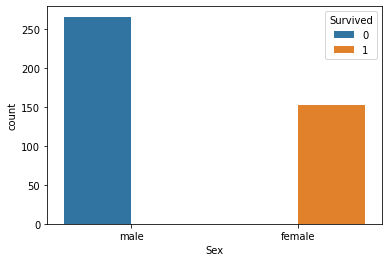

In [11]:
sns.countplot(x='Sex',hue='Survived',data=data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

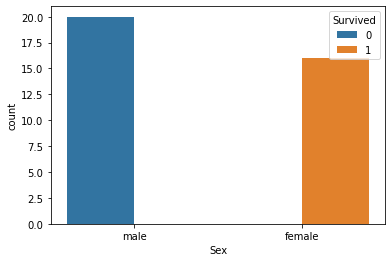

In [12]:
sns.countplot(x='Sex',hue='Survived',data=senior)

In [13]:
senior.groupby('Pclass')['Sex'].value_counts()

Pclass  Sex   
1       female    15
        male      13
2       male       5
        female     1
3       male       2
Name: Sex, dtype: int64

In [14]:
#Sex ratio initially
total=data['Sex'].value_counts()
total['female']/total['male']

0.5714285714285714

In [15]:
data[(data['SibSp']==0) & (data['Parch']==0)]['Survived'].value_counts()

0    185
1     68
Name: Survived, dtype: int64

In [16]:
data[(data['SibSp']==0) & (data['Parch']==0) & (data['Survived']==1)]['Survived'].value_counts()

1    68
Name: Survived, dtype: int64

In [17]:
data[data['Embarked']=='Q']['Survived'].value_counts()

1    24
0    22
Name: Survived, dtype: int64

In [18]:
#Survival rate of people belonging to Pclass=1 and embarked='Q'
we=data[(data['Pclass']==1) & (data['Embarked']=='Q')]['Survived'].value_counts()
(we[1]/we.sum())*100

100.0

<AxesSubplot:xlabel='Pclass,Sex'>

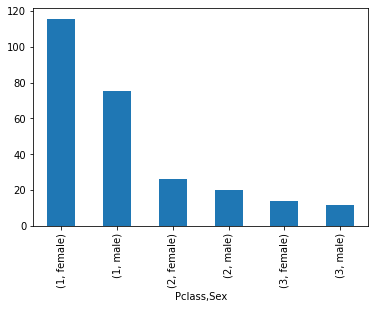

In [19]:
#Fare based on Pclass with hue on gender
data.groupby(['Pclass','Sex'])['Fare'].mean().plot(kind='bar')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

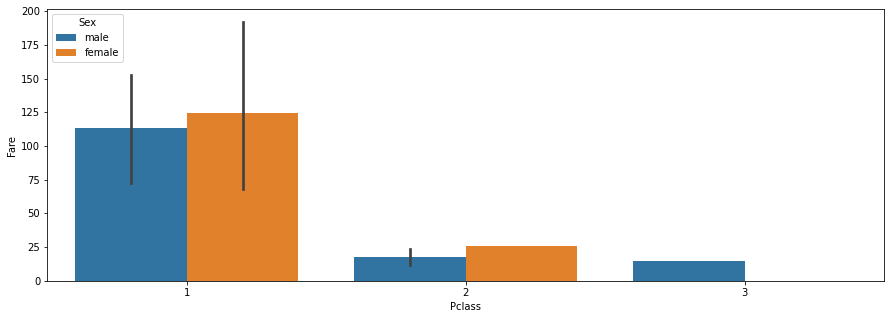

In [20]:
#Fare of gender in different Pclass for seniors i.e. Age>50
plt.figure(figsize=(15,5))
sns.barplot(x='Pclass',y='Fare',hue='Sex',data=senior)

<AxesSubplot:xlabel='Sex'>

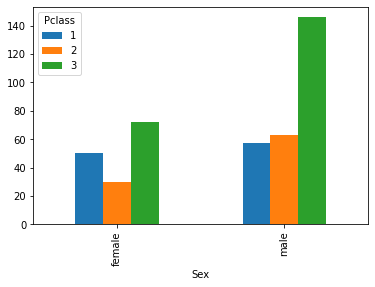

In [21]:
pd.crosstab(data.Sex,data.Pclass).plot(kind='bar')

<AxesSubplot:xlabel='Survived'>

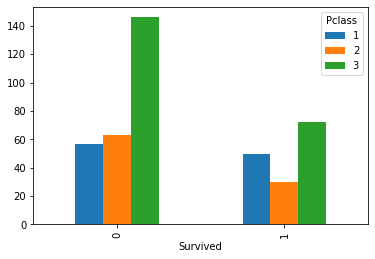

In [22]:
pd.crosstab(data.Survived,data.Pclass).plot(kind='bar')

<AxesSubplot:xlabel='Embarked'>

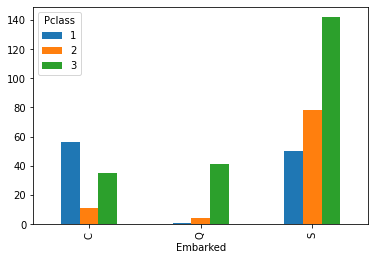

In [23]:
pd.crosstab(data.Embarked,data.Pclass).plot(kind='bar')

<AxesSubplot:ylabel='Pclass'>

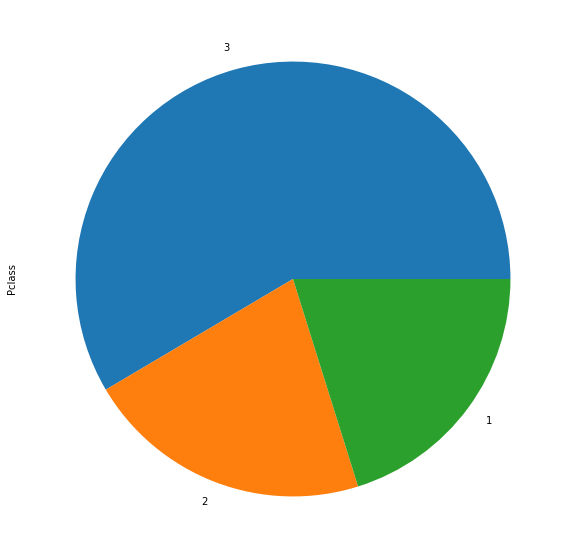

In [24]:
#In which class max single individuals are travelling
plt.figure(figsize=(15,10))
data[(data['SibSp']==0) & (data['Parch']==0)]['Pclass'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Sex'>

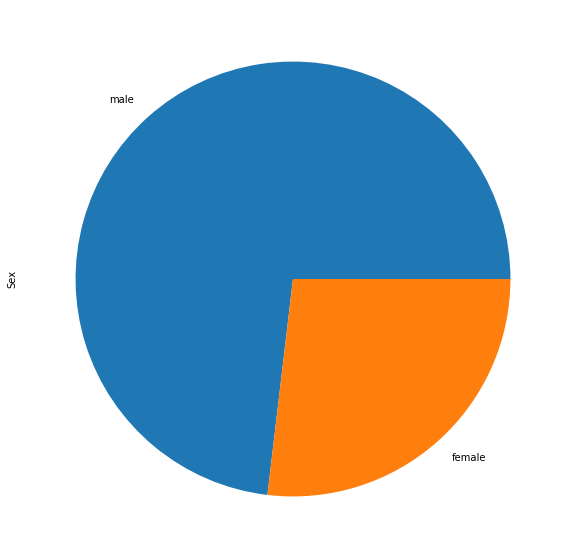

In [25]:
#Maximum individuals gender 
plt.figure(figsize=(15,10))
data[(data['SibSp']==0) & (data['Parch']==0)]['Sex'].value_counts().plot(kind='pie')

In [26]:
data.shape

(418, 12)

In [27]:
#To drop Cabin column
data.drop(['Cabin'],axis=1,inplace=True)

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [29]:
data.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

<AxesSubplot:>

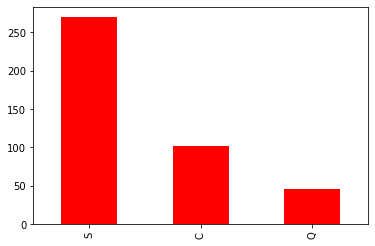

In [30]:
#To fill the Embarked column best way is to fill it by mode 
data['Embarked'].value_counts().plot(kind='bar',color='red')

In [31]:
data['Embarked'].fillna('S',inplace=True)

<AxesSubplot:>

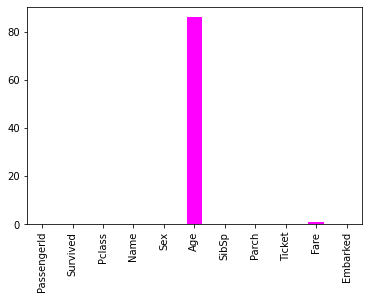

In [32]:
data.isnull().sum().plot(kind='bar',color='magenta')

In [33]:
#Class wise mean of age 
data.groupby('Pclass')["Age"].mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [34]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 40.918367
        if Pclass==2:
            return 28.777500
        if Pclass==3:
            return 24.027945
    else:
        return Age

In [35]:
data["Age"]=data[["Age","Pclass"]].apply(input_age,axis=1)

<AxesSubplot:>

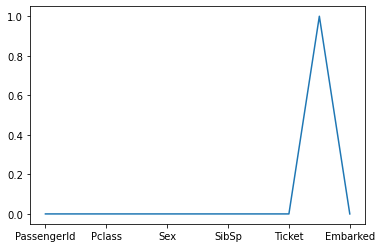

In [36]:
data.isnull().sum().plot()

In [37]:
#Class wise mean of fare 
data.groupby('Pclass')["Fare"].mean()

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

In [38]:
def input_fare(cols):
    Fare=cols[0]
    Pclass=cols[1]
    if pd.isnull(Fare):
        if Pclass==1:
            return 94.280297
        if Pclass==2:
            return 22.202104
        if Pclass==3:
            return 12.459678
    else:
        return Fare

In [39]:
data["Fare"]=data[["Fare","Pclass"]].apply(input_fare,axis=1)

<AxesSubplot:>

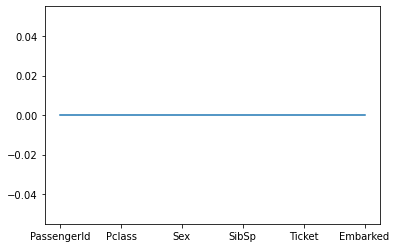

In [40]:
data.isnull().sum().plot()

In [41]:
#Converting Categorical values into Numerical Ones
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['Sex']=lb.fit_transform(data["Sex"])
data['Embarked']=lb.fit_transform(data["Embarked"])

In [42]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


<AxesSubplot:>

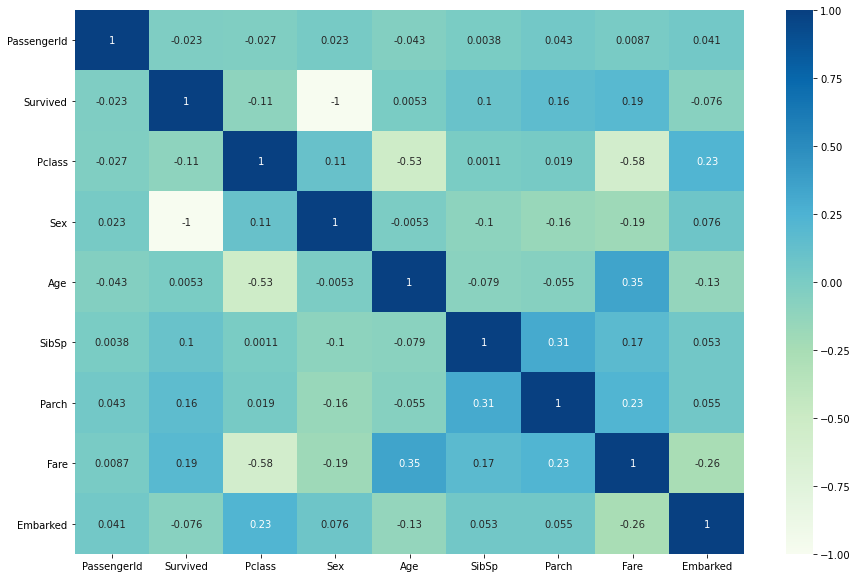

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='GnBu')

In [44]:
#Dropping non essential data
data.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [45]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [46]:
x=data.drop('Survived',axis=1)
y=data['Survived']

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((292, 7), (126, 7), (292,), (126,))

# Using logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_test

C:\Users\BOAZ\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


345    1
378    0
178    1
367    1
191    0
      ..
220    1
93     0
353    0
132    1
97     0
Name: Survived, Length: 126, dtype: int64

In [50]:
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score
lr=accuracy_score(y_test,y_pred)*100
lr

100.0

# Using NAive-Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
nb=accuracy_score(y_test,y_pred)*100
nb

100.0

#Using Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [55]:
#Accuracy using Decision Tree
from sklearn import metrics
dt=metrics.accuracy_score(y_test,y_pred)*100
dt

100.0

In [56]:
feature_cols=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

# SVM

In [57]:
from sklearn.svm import SVC
svc_classifier=SVC(kernel='linear')
svc_classifier.fit(X_train,y_train)
y_pred=svc_classifier.predict(X_test)

In [58]:
y_pred=svc_classifier.predict(X_test)

In [59]:
from sklearn import metrics
sv=metrics.accuracy_score(y_test,y_pred)*100
sv

100.0

 Using KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(3,10):
    knn_classifier=KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn_classifier.fit(X_train,y_train)
    y_pred=knn_classifier.predict(X_test)
    from sklearn import metrics
    print(i, metrics.accuracy_score(y_test,y_pred)*100)

3 68.25396825396825
4 69.84126984126983
5 66.66666666666666
6 67.46031746031747
7 66.66666666666666
8 64.28571428571429
9 64.28571428571429


In [61]:
#Hence maximum accuracy in KNN is at n=4
knn_classifier=KNeighborsClassifier(n_neighbors=4,metric='euclidean')
knn_classifier.fit(X_train,y_train)
y_pred=knn_classifier.predict(X_test)
from sklearn import metrics
kn=metrics.accuracy_score(y_test,y_pred)*100
kn

69.84126984126983

In [62]:
#Important columns in model
from sklearn.ensemble import RandomForestClassifier
radm_clf=RandomForestClassifier(max_depth=10,n_estimators=40)
radm_clf.fit(X_train,y_train)
feature_rank=pd.DataFrame({'feature':X_train.columns,'importance':radm_clf.feature_importances_})

<AxesSubplot:xlabel='importance', ylabel='feature'>

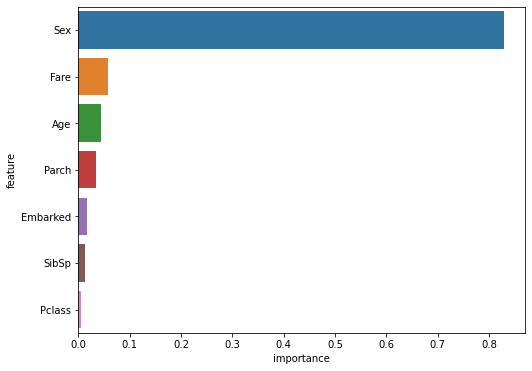

In [63]:
feature_rank=feature_rank.sort_values('importance',ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(y='feature',x='importance',data=feature_rank)

In [64]:
#Using RandomForestClassifier method
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
tuned_parameters=[{'max_depth':[10,20,30,40],'n_estimators':[10,20,30,40,50,60,70,80,90,100]}]
radm_clf=RandomForestClassifier()
clf_grid=GridSearchCV(radm_clf,tuned_parameters,cv=5,scoring='accuracy')
clf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 20, 30, 40],
                          'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                           100]}],
             scoring='accuracy')

In [65]:
clf_grid.best_params_

{'max_depth': 10, 'n_estimators': 10}

In [66]:
clf_grid.best_score_*100

100.0

In [67]:
#FInal model using best params
radm_clf=RandomForestClassifier(max_depth=10,n_estimators=10,max_features='auto')
radm_clf.fit(X_train,y_train)


RandomForestClassifier(max_depth=10, n_estimators=10)

In [68]:
y_pred=radm_clf.predict(X_test)
rf=accuracy_score(y_test,y_pred)*100
rf

100.0

In [69]:
feature=['LogisticRegression','NaiveBayes','DecisionTree','SVM','KNN','RandomForest']
accurate=[lr,nb,dt,sv,kn,rf]
accurate

[100.0, 100.0, 100.0, 100.0, 69.84126984126983, 100.0]

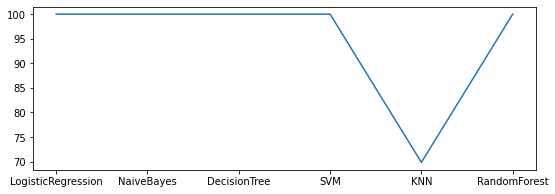

In [70]:
names = feature
values = accurate

plt.figure(figsize=(9, 3))


plt.plot(names, values)
plt.show()


HENCE BEST MODEL CAN BE ANY AMONG Logistic Regression, NaiveBayes, DecisionTree, SVM and RandomForest

Thank You

In [71]:
import pyforest

In [72]:
# Model Class to be used for different ML algorithms
class ClassifierModel(object):
    def __init__(self, clf, params=None):
        self.clf = clf(**params)
def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
    
        def fit(self,x,y):
            return self.clf.fit(x,y)
    
        def feature_importances(self,x,y):
            return self.clf.fit(x,y).feature_importances_
        
        def predict(self, x):
            return self.clf.predict(x)
        
def trainModel(model, x_train, y_train, x_test, n_folds, seed):
    cv = KFold(n_splits= n_folds, random_state=seed)
    scores = cross_val_score(model.clf, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

##### Random Forest Classifier

In [73]:
# Random Forest parameters
rf_params = {
    'n_estimators': 400,
    'max_depth': 5,
    'min_samples_leaf': 3,
    'max_features' : 'sqrt',
}
rfc_model = ClassifierModel(clf=RandomForestClassifier, params=rf_params)
rfc_scores = trainModel(rfc_model,x_train, y_train, x_test, 5, 0)
rfc_scores

NameError: name 'x_train' is not defined

##### Extra Trees Classifier

In [74]:
 # Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':400,
    'max_depth': 5,
    'min_samples_leaf': 2,
}
etc_model = ClassifierModel(clf=ExtraTreesClassifier, params=et_params)
etc_scores = trainModel(etc_model,x_train, y_train, x_test, 5, 0) # Random Forest
etc_scores

NameError: name 'ExtraTreesClassifier' is not defined

 ##### AdaBoost Classifier

In [75]:
# AdaBoost parameters
ada_params = {
    'n_estimators': 400,
    'learning_rate' : 0.65
}
ada_model = ClassifierModel(clf=AdaBoostClassifier, params=ada_params)
ada_scores = trainModel(ada_model,x_train, y_train, x_test, 5, 0) # Random Forest
ada_scores

NameError: name 'AdaBoostClassifier' is not defined

##### XGBoost Classifier

In [76]:
# Gradient Boosting parameters
gb_params = {
    'n_estimators': 400,
    'max_depth': 6,
}
gbc_model = ClassifierModel(clf=GradientBoostingClassifier, params=gb_params)
gbc_scores = trainModel(gbc_model,x_train, y_train, x_test, 5, 0) # Random Forest
gbc_scores

<IPython.core.display.Javascript object>

NameError: name 'x_train' is not defined

In [77]:
x_train = np.column_stack(( etc_train_pred, rfc_train_pred, ada_train_pred, gbc_train_pred, svc_train_pred))

NameError: name 'etc_train_pred' is not defined

In [78]:
def trainStackModel(x_train, y_train, x_test, n_folds, seed):
    cv = KFold(n_splits= n_folds, random_state=seed)
    gbm = xgb.XGBClassifier(
     n_estimators= 2000,
     max_depth= 4,
     min_child_weight= 2,
     gamma=0.9,                        
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     scale_pos_weight=1).fit(x_train, y_train)
    
    scores = cross_val_score(gbm, x_train, y_train, scoring='accuracy', cv=cv)
    return scores
